In [1]:
from utils.function import *

In [2]:
# # Pfad zum Datensatz
# dataset_path = "/home/tguenther/Data/GERALD_v1_5_thomas/cropped_images_speed_sorted/"

# Aufruf starten
best_df_results, hyperparam_summary, best_params = run_grid_search_morph_only()
# import ace_tools as tools; tools.display_dataframe_to_user(name="Hyperparameter Summary", dataframe=hyperparam_summary


Grid-Search mit Morphologie (ohne Binarisierung):   0%|          | 0/144 [00:00<?, ?it/s]

Grid-Search mit Morphologie (ohne Binarisierung): 100%|██████████| 144/144 [05:26<00:00,  2.27s/it]


In [4]:
hyperparam_summary

,blur,kernel_size,clahe,clip_limit,tile_grid_size,morph,morph_kernel_size,morph_iterations,accuracy_hoch,accuracy_mittel,accuracy_niedrig,mae
0,False,5,False,2.0,"(8, 8)",False,1,1,0.300000,0.131387,0.062845,3.267241
1,False,5,False,2.0,"(8, 8)",False,1,2,0.300000,0.131387,0.062845,3.267241
2,False,5,False,2.0,"(8, 8)",False,2,1,0.300000,0.131387,0.062845,3.267241
3,False,5,False,2.0,"(8, 8)",False,2,2,0.300000,0.131387,0.062845,3.267241
4,False,5,False,2.0,"(8, 8)",False,3,1,0.300000,0.131387,0.062845,3.267241
...,...,...,...,...,...,...,...,...,...,...,...,...
139,True,9,True,2.0,"(8, 8)",True,1,2,0.433333,0.211679,0.066152,3.440299
140,True,9,True,2.0,"(8, 8)",True,2,1,0.383333,0.182482,0.051819,2.504762
141,True,9,True,2.0,"(8, 8)",True,2,2,0.333333,0.138686,0.033076,13.930233
142,True,9,True,2.0,"(8, 8)",True,3,1,0.350000,0.160584,0.040794,3.193182


In [5]:
# Filtern der Zeilen mit Bedingung == True
filtered_df = hyperparam_summary[hyperparam_summary['morph'] == True]

# Finden des Indexes der Zeile mit dem höchsten Wert in der 'Wert'-Spalte
max_index = filtered_df['accuracy_hoch'].idxmax()

# Extrahieren der Zeile mit dem höchsten Wert und Bedingung == True
max_row = hyperparam_summary.loc[max_index]

print(max_row)


blur                     True
kernel_size                 7
clahe                    True
clip_limit                2.0
tile_grid_size         (8, 8)
morph                    True
morph_kernel_size           1
morph_iterations            1
accuracy_hoch        0.433333
accuracy_mittel      0.218978
accuracy_niedrig     0.071665
mae                  2.705479
Name: 114, dtype: object


In [6]:
hyperparam_summary.describe()

,kernel_size,clip_limit,morph_kernel_size,morph_iterations,accuracy_hoch,accuracy_mittel,accuracy_niedrig,mae
count,144.000000,144.0,144.000000,144.000000,144.000000,144.000000,144.000000,144.000000
mean,7.000000,2.0,2.000000,1.500000,0.318634,0.154653,0.048205,10.867369
std,1.638693,0.0,0.819346,0.501745,0.082748,0.045111,0.019035,10.533553
min,5.000000,2.0,1.000000,1.000000,0.083333,0.065693,0.012128,0.316456
25%,5.000000,2.0,1.000000,1.000000,0.295833,0.114964,0.031974,3.248726
50%,7.000000,2.0,2.000000,1.500000,0.316667,0.131387,0.048512,5.517007
75%,9.000000,2.0,3.000000,2.000000,0.383333,0.211679,0.062845,20.363636
max,9.000000,2.0,3.000000,2.000000,0.433333,0.218978,0.071665,37.968254


In [5]:
# OCR-Reader initialisieren
reader = easyocr.Reader(['de'])

# Pfad zum Datensatz
dataset_path = "/home/tguenther/Data/GERALD_v1_5_thomas/cropped_images_speed_sorted/"


In [ ]:
best_df_results_baseline = evaluate_ocr_on_dataset(binarize=False, blur=False, clahe=False)
df_results_bin = evaluate_ocr_on_dataset(binarize=True, blur=False, clahe=False)
df_results_blur = evaluate_ocr_on_dataset(binarize=False, blur=True, clahe=False)
df_results_clahe = evaluate_ocr_on_dataset(binarize=False, blur=False, clahe=True)

Verarbeite 16: 100%|██████████| 23/23 [00:00<00:00, 399.94it/s]



OCR-Accuracy pro Auflösungskategorie:
resolution_category
hoch       0.300000
mittel     0.131387
niedrig    0.062845


Verarbeite 16: 100%|██████████| 23/23 [00:00<00:00, 348.07it/s]



OCR-Accuracy pro Auflösungskategorie:
resolution_category
hoch       0.016667
mittel     0.087591
niedrig    0.091510


Verarbeite 16: 100%|██████████| 23/23 [00:00<00:00, 393.10it/s]



OCR-Accuracy pro Auflösungskategorie:
resolution_category
hoch       0.416667
mittel     0.211679
niedrig    0.070562


Verarbeite 16: 100%|██████████| 23/23 [00:00<00:00, 315.73it/s]


OCR-Accuracy pro Auflösungskategorie:
resolution_category
hoch       0.316667
mittel     0.109489
niedrig    0.031974


In [4]:
# Ergebnisse in DataFrame umwandeln und zählen
df_counts = df_results['resolution_category'].value_counts()

# Ausgabe der Sample-Anzahl pro Kategorie
print("Anzahl der Samples pro Auflösungskategorie:")
print(df_counts)


Anzahl der Samples pro Auflösungskategorie:
resolution_category
niedrig    907
mittel     137
hoch        61
Name: count, dtype: int64


In [5]:
# Accuracy pro Kategorie
accuracy_by_resolution = df_results.groupby('resolution_category')['correct'].mean()
print(accuracy_by_resolution)
'''
Extrem niedrige Accuracy (< 30%) deutet meist darauf hin, dass grundlegende Probleme existieren, sodass der Zusammenhang mit der Auflösung möglicherweise weniger entscheidend ist als andere Einflussgrößen.
'''

# # Metrische Korrelation (z.B. Breite vs Accuracy)
# import matplotlib.pyplot as plt
# import seaborn as sns

# plt.figure(figsize=(10, 6))
# sns.boxplot(x='resolution_category', y='width', hue='correct', data=df_results)
# plt.title('OCR-Korrektheit in Abhängigkeit von der Bildbreite')
# plt.xlabel('Auflösungskategorie')
# plt.ylabel('Bildbreite (Pixel)')
# plt.show()
# '''
# 1. Es gibt eine leichte Tendenz, dass Bilder mit höherer Auflösung besser erkannt werden. Zu erkennen an den Medianen. Bei hoch (False) ist eine hohe Varianz zu erkennen, d.h. nicht nur die Auflösung bestimmt die Qualität der OCR, sondern eventuell auch Bildqualität oder andere Faktoren sind noch entscheidend.
# 2. Ich kann keinen Grenzwert erkennen ab dem die OCR Erkennung zuverlässig arbeitet.
# 3. Hoch: Trotz hoher Auflösung gibt es noch falsche OCR Erkennung.
# 4. Die statistische Aussagekraft ist bei hoch recht leicht gewichtig auf Grund der geringen Sampleanzahl. Runter setzen auf unter 90
# '''

resolution_category
hoch       0.311475
mittel     0.102190
niedrig    0.060639
Name: correct, dtype: float64


'\nExtrem niedrige Accuracy (< 30%) deutet meist darauf hin, dass grundlegende Probleme existieren, sodass der Zusammenhang mit der Auflösung möglicherweise weniger entscheidend ist als andere Einflussgrößen.\n'

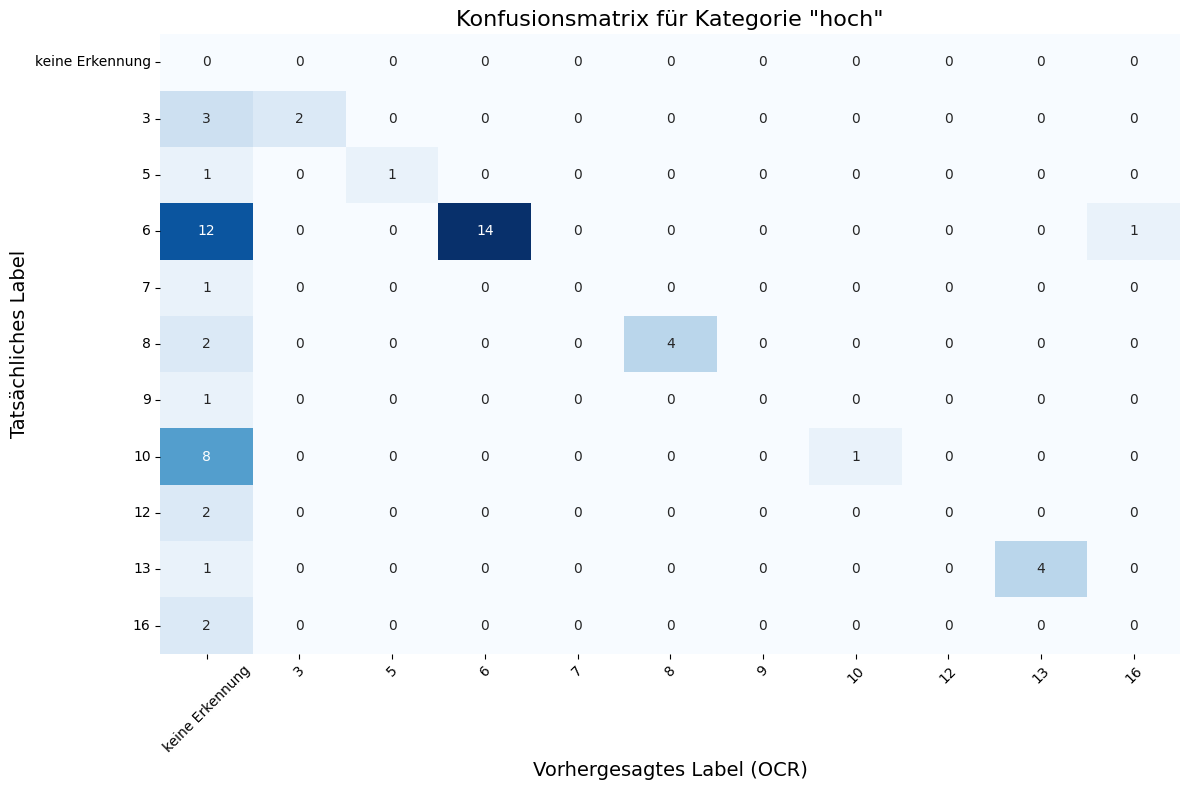

In [7]:
# DataFrame filtern: Nur Kategorie "hoch"
df_hoch = best_df_results[best_df_results['resolution_category'] == 'hoch'].copy()

# NaN-Werte in 'predicted_label' mit eigenem Wert auffüllen (z.B. -1 für "kein Ergebnis")
df_hoch['predicted_label_filled'] = df_hoch['predicted_label'].fillna(-1).astype(int)

# Labels ermitteln (alle vorkommenden Labels, inklusive "kein Ergebnis")
labels = np.sort(df_hoch['true_label'].unique())
if -1 in df_hoch['predicted_label_filled'].values:
    labels = np.insert(labels, 0, -1)  # Füge "-1" am Anfang hinzu, falls vorhanden

# Konfusionsmatrix berechnen
cm = confusion_matrix(
    df_hoch['true_label'], 
    df_hoch['predicted_label_filled'], 
    labels=labels
)

# Labels für die Achsen vorbereiten
label_names = ['keine Erkennung' if label == -1 else str(label) for label in labels]

# Konfusionsmatrix visualisieren
plt.figure(figsize=(12, 8))
sns.heatmap(
    cm, 
    annot=True, 
    fmt='d', 
    cmap='Blues', 
    xticklabels=label_names, 
    yticklabels=label_names,
    cbar=False
)
plt.title('Konfusionsmatrix für Kategorie "hoch"', fontsize=16)
plt.xlabel('Vorhergesagtes Label (OCR)', fontsize=14)
plt.ylabel('Tatsächliches Label', fontsize=14)
plt.yticks(rotation=0)
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [17]:
# Nur Fehler in der Kategorie "hoch" filtern
ocr_fehler_hoch = best_df_results[
    (best_df_results['resolution_category'] == 'hoch') & 
    (~best_df_results['correct'])
    # (best_df_results['correct'])
]

# Wichtige Spalten übersichtlich darstellen:
ocr_fehler_hoch = ocr_fehler_hoch[['path', 'true_label', 'predicted_label', 'width', 'height']]

# Ausgabe der Ergebnisse
print("OCR-Fehler der Kategorie 'hoch':")
print(ocr_fehler_hoch.to_string(index=False))

OCR-Fehler der Kategorie 'hoch':
                                                                                                                              path  true_label  predicted_label  width  height
               /home/tguenther/Data/GERALD_v1_5_thomas/cropped_images_speed_sorted/03/K%C3%B6ln_Wuppertal.mp4#t=32.9_Zs_3_03_1.jpg           3              NaN     95      82
          /home/tguenther/Data/GERALD_v1_5_thomas/cropped_images_speed_sorted/03/K%C3%B6ln_Wuppertal.mp4#t=33.133333_Zs_3_03_1.jpg           3              NaN    126      95
           /home/tguenther/Data/GERALD_v1_5_thomas/cropped_images_speed_sorted/03/Werlau-K%C3%B6ln.mp4#t=1357.733333_Zs_3_03_1.jpg           3              NaN     98      82
                   /home/tguenther/Data/GERALD_v1_5_thomas/cropped_images_speed_sorted/05/Koeln-Opladen#t=470.068966_Lf_1_05_1.jpg           5              NaN    111     103
              /home/tguenther/Data/GERALD_v1_5_thomas/cropped_images_speed_sorted/06/Muenche

In [18]:
# Abgeschnittene Fotos sind ein Problem.

In [20]:
best_params

{'binarize': False,
 'block_size': 11,
 'C': 2,
 'blur': True,
 'kernel_size': 7,
 'clahe': True,
 'clip_limit': 2.0,
 'tile_grid_size': (8, 8),
 'morph': False,
 'morph_kernel_size': 2,
 'morph_iterations': 1}

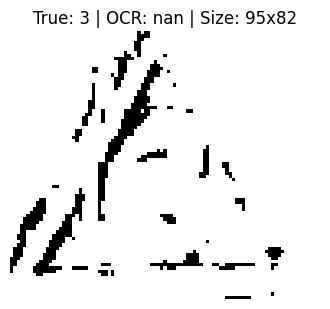

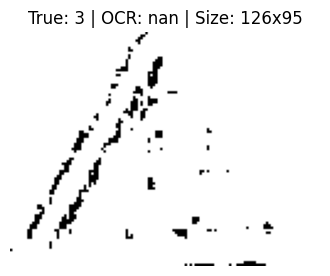

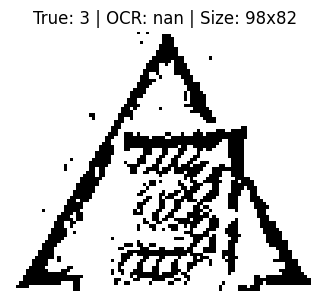

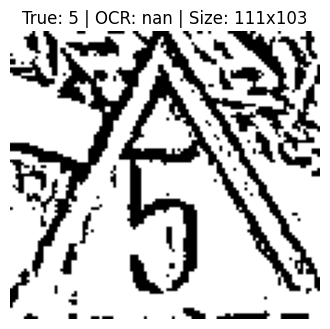

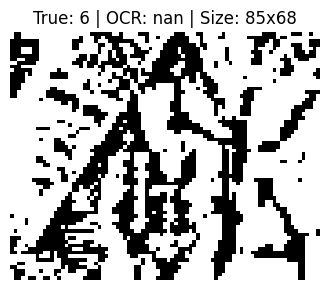

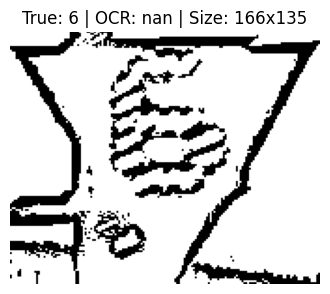

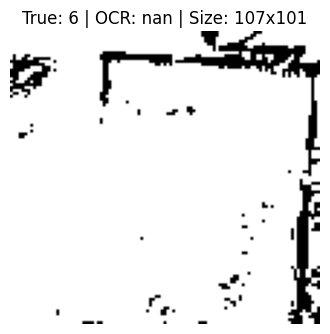

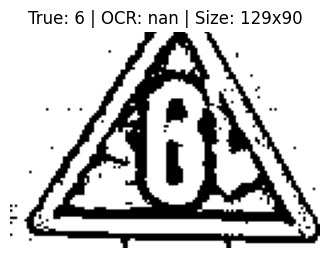

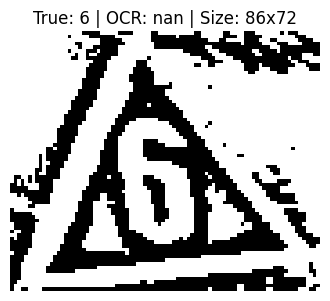

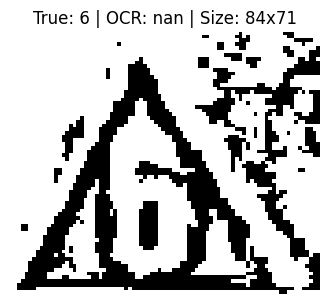

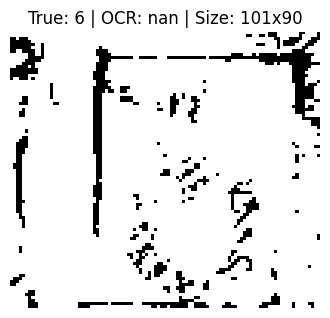

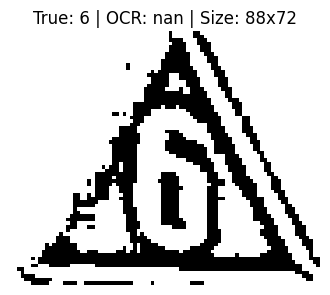

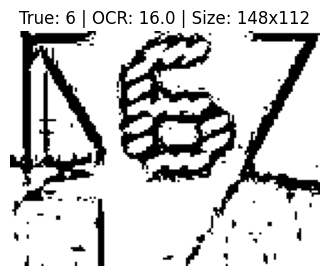

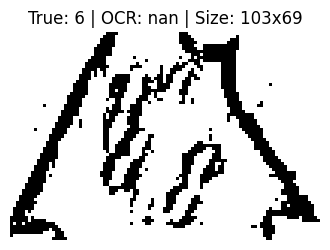

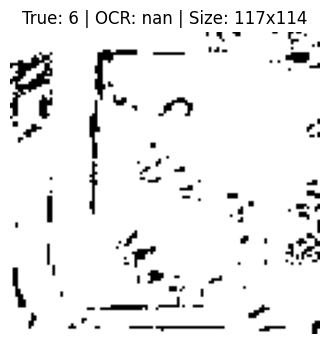

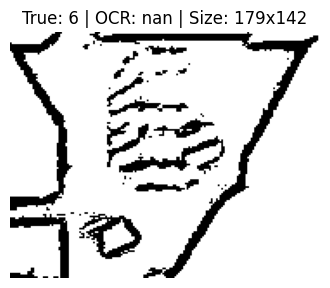

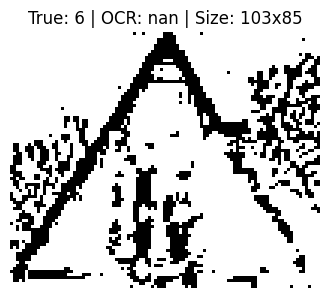

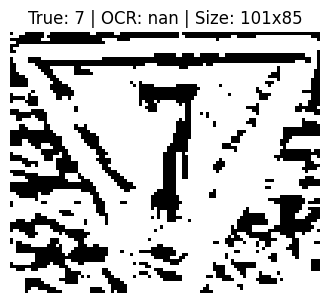

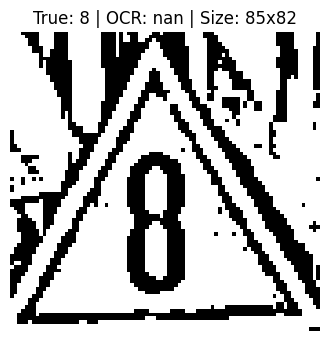

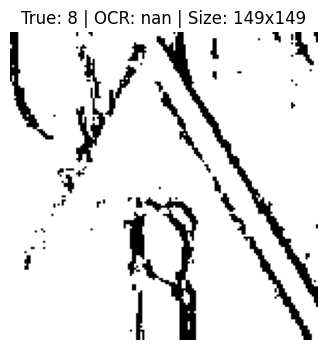

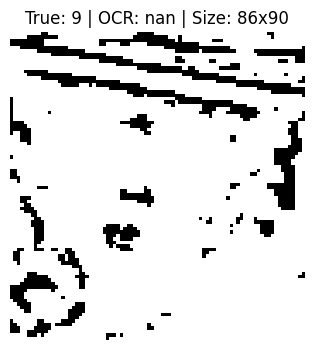

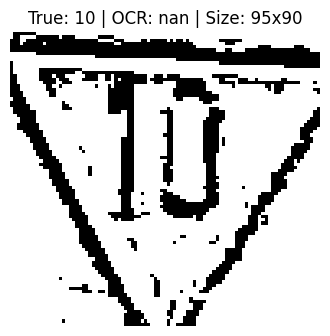

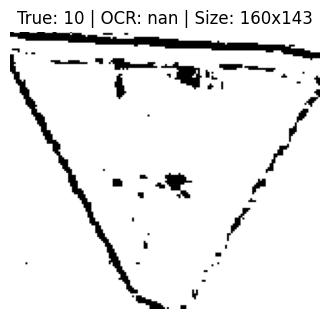

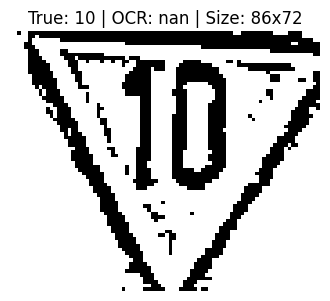

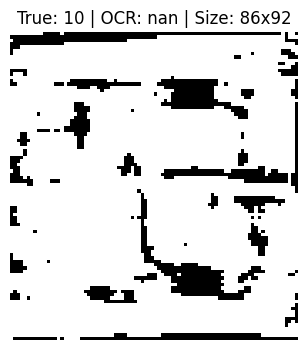

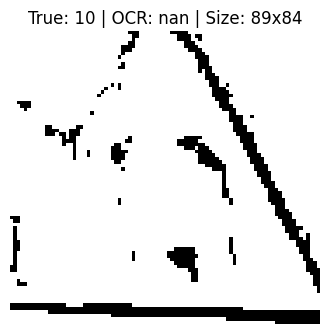

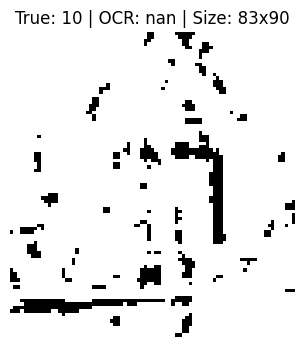

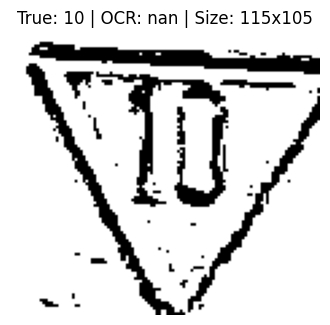

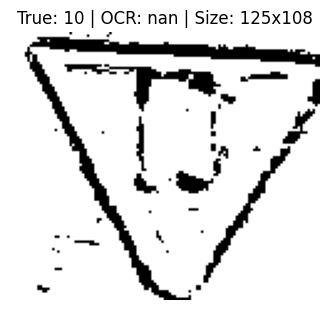

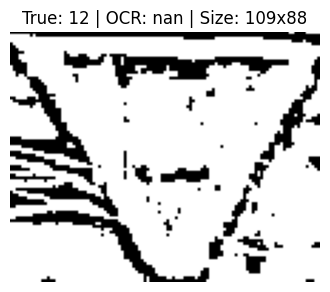

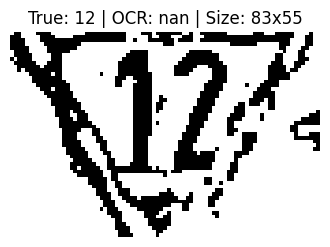

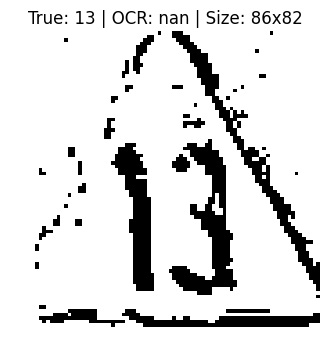

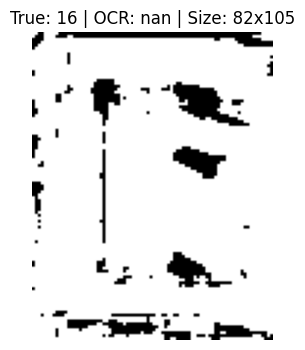

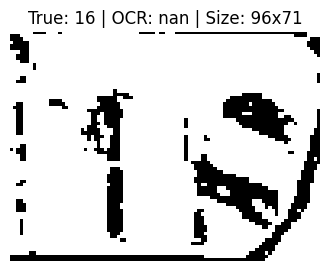

In [21]:
for idx, row in ocr_fehler_hoch.iterrows():
    # Bild laden
    img = cv2.imread(row['path'])
    if img is None:
        continue  # Bild konnte nicht geladen werden

    # Bild vorverarbeiten mit entpackten Parametern
    binary_img = preprocess_image(
        img,
        best_params
    )

    # Anzeige
    plt.figure(figsize=(4, 4))
    plt.imshow(binary_img, cmap='gray')
    plt.title(f"True: {row['true_label']} | OCR: {row['predicted_label']} | Size: {row['width']}x{row['height']}")
    plt.axis('off')
    plt.show()